In [1]:
from pathways.scenarios import run_scenarios, load_scenario_table
from pathways.simulation import load_configuration
from pathways.outputs import save_scenario_result_to_pandas

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path
datadir = Path("tests/test_summaries")
basic_config = load_configuration(datadir / "config.yml")
scenario_table = load_scenario_table(datadir / "scenarios_config.csv")
results = run_scenarios(
    config=basic_config,
    scenario_table=scenario_table,
    seed=42,
    num_simulations=2,
    num_shipments=10,
)

large_1
large_2
large_3
large_4
large_5
large_6
large_7
large_8
large_9
large_10
large_11
large_12
large_13
large_14
large_15
large_16
large_17
large_18
large_19
large_20
large_21
large_22
large_23
large_24
large_25
large_26
large_27
large_28
large_29
large_30
large_31
large_32
large_33
large_34
large_35
large_36
large_37
large_38
large_39
large_40
large_41
large_42
large_43
large_44
large_45
large_46
large_47
large_48
small_1
small_2
small_3
small_4
small_5
small_6
small_7
small_8
small_9
small_10
small_11
small_12
small_13
small_14
small_15
small_16
small_17
small_18
small_19
small_20
small_21
small_22
small_23
small_24
small_25
small_26
small_27
small_28
small_29
small_30
small_31
small_32
small_33
small_34
small_35
small_36
small_37
small_38
small_39
small_40
small_41
small_42
small_43
small_44
small_45
small_46
small_47
small_48
maritime_1
maritime_2
maritime_3
maritime_4
maritime_5
maritime_6
maritime_7
maritime_8
maritime_9
maritime_10
maritime_11
maritime_12
maritime_13
maritim

In [4]:
df = save_scenario_result_to_pandas(
    results,
    config_columns=[
        "name",
        "shipment/boxes/min",
        "shipment/boxes/max",
        "shipment/stems_per_box/default",
        "pest/infestation_rate/parameters",
        "inspection/unit",
        "inspection/sample_strategy",
        "inspection/percentage/proportion",
        "inspection/hypergeometric/detection_level",
        "inspection/selection_strategy",
        "inspection/within_box_pct",
        "inspection/hierarchical/outer",
    ],
    result_columns=[
        "missing",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
    ],
)

In [5]:
df

,name,shipment/boxes/min,shipment/boxes/max,shipment/stems_per_box/default,pest/infestation_rate/parameters,inspection/unit,inspection/sample_strategy,inspection/percentage/proportion,inspection/hypergeometric/detection_level,inspection/selection_strategy,inspection/within_box_pct,inspection/hierarchical/outer,missing,avg_boxes_opened_completion,avg_boxes_opened_detection
0,large_1,25,500,200,"[1, 80]",box,percentage,0.02,,tailgate,1.00,,0.000000,6.00,1.90
1,large_2,25,500,200,"[1, 80]",box,percentage,0.02,,random,1.00,,5.000000,5.35,2.25
2,large_3,25,500,200,"[1, 80]",box,percentage,0.05,,tailgate,1.00,,0.000000,13.90,1.90
3,large_4,25,500,200,"[1, 80]",box,percentage,0.05,,random,1.00,,5.000000,14.15,2.65
4,large_5,25,500,200,"[1, 80]",box,percentage,0.1,,tailgate,1.00,,0.000000,27.40,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,clustered_small_44,1,3,200,"[1, 80]",stem,hypergeometric,,0.1,hierarchical,0.25,interval,92.857143,1.00,1.00
428,clustered_small_45,1,3,200,"[1, 80]",stem,hypergeometric,,0.25,tailgate,1.00,,100.000000,1.00,1.00
429,clustered_small_46,1,3,200,"[1, 80]",stem,hypergeometric,,0.25,random,1.00,,88.888889,1.95,1.90
430,clustered_small_47,1,3,200,"[1, 80]",stem,hypergeometric,,0.25,hierarchical,0.25,random,92.857143,1.00,1.00


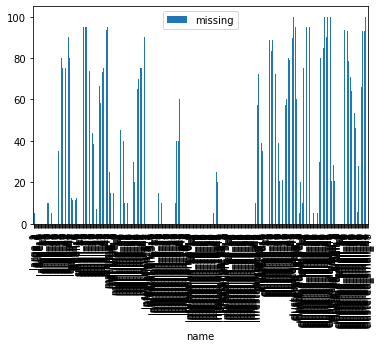

In [6]:
df.plot(kind="bar", x="name", y="missing")

In [7]:
df["shipment"] = df.apply(lambda row: re.sub("_[0-9]+$", "", row["name"]), axis = 1)

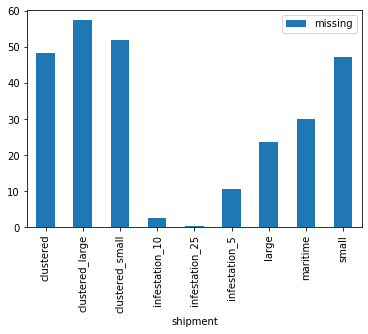

In [8]:
df.groupby("shipment").agg({"missing": "mean"}).reset_index().plot(kind="bar", x="shipment", y="missing")

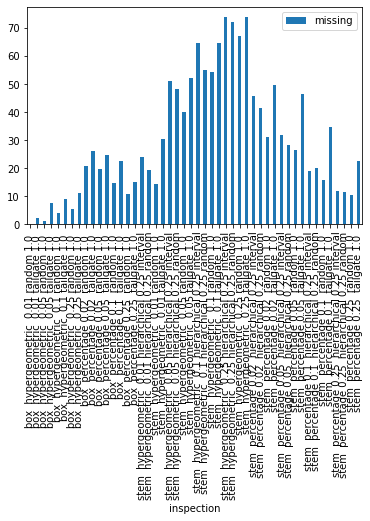

In [9]:
df["inspection"] = df.apply(lambda row: f"{row['inspection/unit']}  {row['inspection/sample_strategy']} {row['inspection/percentage/proportion']} {row['inspection/hypergeometric/detection_level']} {row['inspection/selection_strategy']} {row['inspection/within_box_pct']} {row['inspection/hierarchical/outer']}", axis = 1)
df.groupby("inspection").agg({"missing": "mean"}).reset_index().plot(kind="bar", x="inspection", y="missing")

In [10]:
inspections_vs_shipments = df.pivot_table(index=["inspection"], columns=["shipment"], values=["missing"])
inspections_vs_shipments

missing  \
shipment                                             clustered   
inspection                                                       
box  hypergeometric  0.01 random 1.0                  0.000000   
box  hypergeometric  0.01 tailgate 1.0                0.000000   
box  hypergeometric  0.05 random 1.0                  0.000000   
box  hypergeometric  0.05 tailgate 1.0                0.000000   
box  hypergeometric  0.1 random 1.0                   0.000000   
box  hypergeometric  0.1 tailgate 1.0                 5.555556   
box  hypergeometric  0.25 random 1.0                  0.000000   
box  hypergeometric  0.25 tailgate 1.0               11.111111   
box  percentage 0.02  random 1.0                     57.222222   
box  percentage 0.02  tailgate 1.0                   77.777778   
box  percentage 0.05  random 1.0                     57.222222   
box  percentage 0.05  tailgate 1.0                   72.222222   
box  percentage 0.1  random 1.0                      45.000000   
box  percentage 0.1  tailgate 1.0                    72.222222   
box  percentage 0.25  random 1.0                     35.000000   
box  percentage 0.25  tailgate 1.0                   38.888889   
stem  hypergeometric  0.01 hierarchical 0.25 in...   16.666667   
stem  hypergeometric  0.01 hierarchical 0.25 ra...   26.111111   
stem  hypergeometric  0.01 random 1.0                21.111111   
stem  hypergeometric  0.01 tailgate 1.0              55.555556   
stem  hypergeometric  0.05 hierarchical 0.25 in...   72.222222   
stem  hypergeometric  0.05 hierarchical 0.25 ra...   60.000000   
stem  hypergeometric  0.05 random 1.0                57.222222   
stem  hypergeometric  0.05 tailgate 1.0              88.888889   
stem  hypergeometric  0.1 hierarchical 0.25 int...   88.888889   
stem  hypergeometric  0.1 hierarchical 0.25 random   78.888889   
stem  hypergeometric  0.1 random 1.0                 80.000000   
stem  hypergeometric  0.1 tailgate 1.0               88.888889   
stem  hypergeometric  0.25 hierarchical 0.25 in...  100.000000   
stem  hypergeometric  0.25 hierarchical 0.25 ra...   89.444444   
stem  hypergeometric  0.25 random 1.0                80.000000   
stem  hypergeometric  0.25 tailgate 1.0             100.000000   
stem  percentage 0.02  hierarchical 0.25 interval    83.333333   
stem  percentage 0.02  hierarchical 0.25 random      73.333333   
stem  percentage 0.02  random 1.0                    62.777778   
stem  percentage 0.02  tailgate 1.0                  88.888889   
stem  percentage 0.05  hierarchical 0.25 interval    33.333333   
stem  percentage 0.05  hierarchical 0.25 random      50.000000   
stem  percentage 0.05  random 1.0                    38.888889   
stem  percentage 0.05  tailgate 1.0                  88.888889   
stem  percentage 0.1  hierarchical 0.25 interval     16.666667   
stem  percentage 0.1  hierarchical 0.25 random       32.222222   
stem  percentage 0.1  random 1.0                     20.000000   
stem  percentage 0.1  tailgate 1.0                   72.222222   
stem  percentage 0.25  hierarchical 0.25 interval    11.111111   
stem  percentage 0.25  hierarchical 0.25 random       5.000000   
stem  percentage 0.25  random 1.0                    20.555556   
stem  percentage 0.25  tailgate 1.0                  38.888889   

                                                                    \
shipment                                           clustered_large   
inspection                                                           
box  hypergeometric  0.01 random 1.0                      0.000000   
box  hypergeometric  0.01 tailgate 1.0                   20.000000   
box  hypergeometric  0.05 random 1.0                     10.000000   
box  hypergeometric  0.05 tailgate 1.0                   70.000000   
box  hypergeometric  0.1 random 1.0                      30.000000   
box  hypergeometric  0.1 tailgate 1.0                    75.000000   
box  hypergeometric  0.25 random 1.0                     4

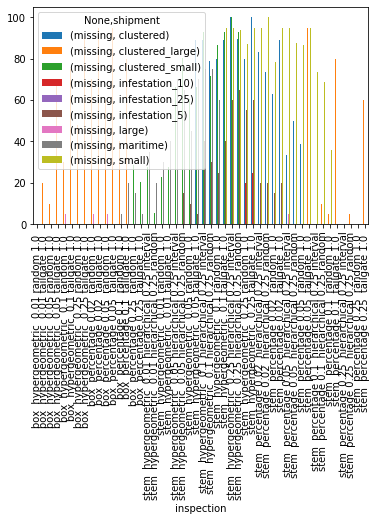

In [11]:
inspections_vs_shipments.plot(kind="bar")

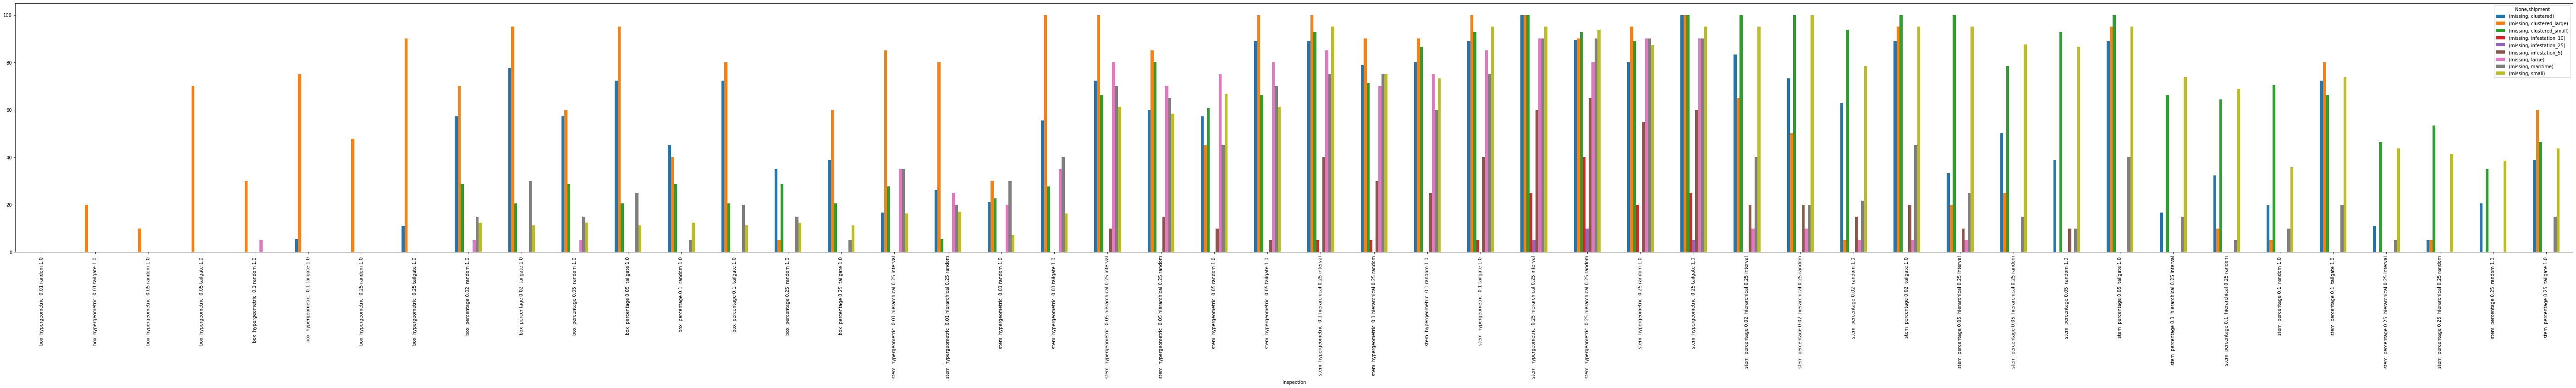

In [12]:
ax = inspections_vs_shipments.plot(kind="bar", figsize=(100, 10))
ax.figure.savefig("inspections_vs_shipments_bar.png")

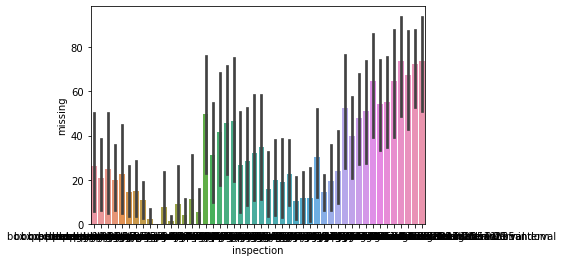

In [13]:
sns.barplot(x="inspection", y="missing", data=df)

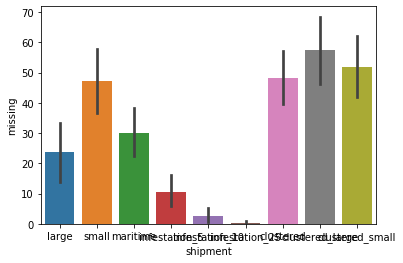

In [14]:
sns.barplot(x="shipment", y="missing", data=df)

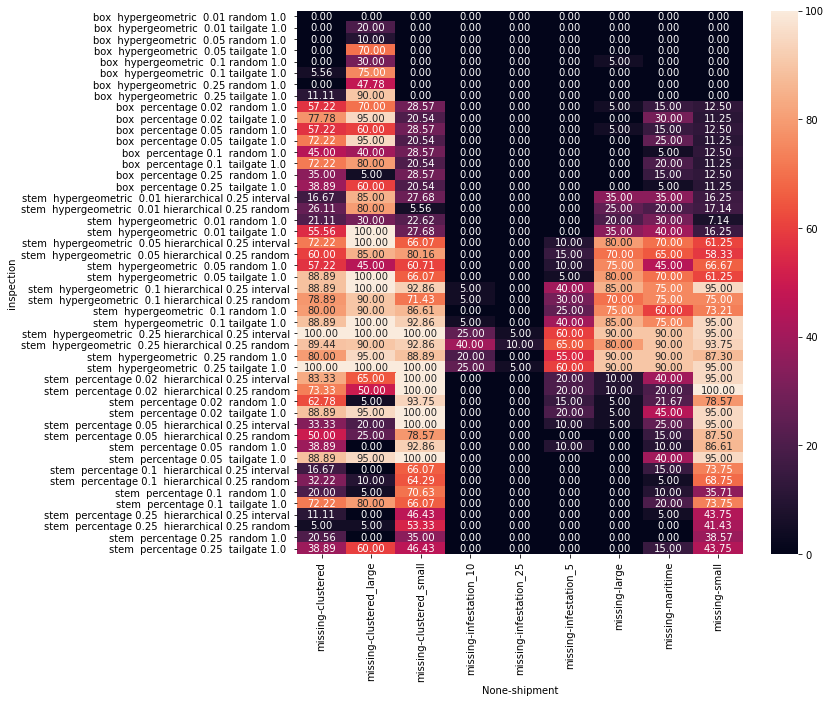

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_shipments, annot=True, fmt=".2f")